# Types of Recommendation System

1. Collaborative Recommendation system
2. Content-based Recommender system
3. Demographi-based Recommender system
4. Utility-based Recommender system
5. Knowledge-based Recommender System

# What is Collaboratibe system?

- Collaboratibe filtering is used to find similar users or items and provide multiple ways to calculate rating based on ratings of similar users.
- User-Based: The system finds out the users who have rated various items in the similar/same way.

# What is Content base filtering System?
- A content-based recommendation system tries to recommend items to users base on their profile. The user's profile revolves around that user's preferences. It is shaped based on user ratings, including the number of times that user has clicked on different items or perhaps even liked those items.

In [1]:
from google.colab import files
files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


# Dataset:- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
import pandas as pd
data = pd.read_csv("IMDB Dataset.csv")
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
data.shape

(50000, 2)

In [6]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [8]:
data.sentiment[0]

'positive'

In [9]:
data['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [10]:
data['sentiment'][3]

'negative'

In [11]:
data.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [13]:
data['sentiment'].replace('positive',1,inplace=True)
data['sentiment'].replace('negative',0,inplace=True)

In [14]:
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

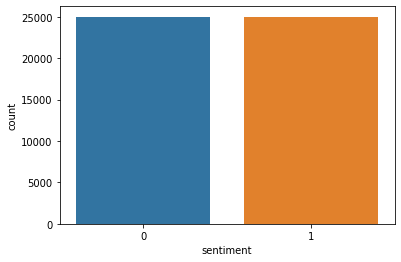

In [16]:
sns.countplot(x='sentiment',data=data)

# Why violin Plot is Used ?
A Violin Plot is used to visualise the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data.

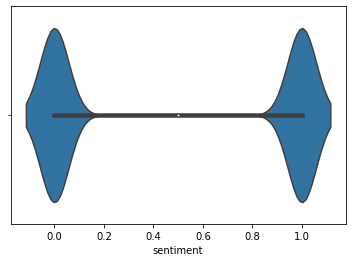

In [17]:
sns.violinplot(x='sentiment',data=data)

In [18]:
data.describe()

sentiment
count  50000.000000
mean       0.500000
std        0.500005
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000

In [19]:

big = data['review'][0]
for i in data['review']:
  if len(i) > len(big):

    big = i
print(big)

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

In [20]:
small = data['review'][0]
for i in data['review']:
  if len(i) < len(small):

    small = i
print(small)

Read the book, forget the movie!


In [21]:
for i in range(len(data['review'])):
  if data['review'][i] == "Read the book, forget the movie!":
       print("The smallest review is at index" , i)

The smallest review is at index 27521


In [22]:
data['review'][27521]

'Read the book, forget the movie!'

In [23]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [24]:
x = data['review']
y = data['sentiment']

In [25]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [26]:
import numpy as np
y = np.array(y)

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0])

# What is Tokenizer ?
Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...


In [28]:
tokenizer = Tokenizer(10000,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)

In [29]:
x[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [30]:
sequence = tokenizer.texts_to_sequences(x)

In [31]:
sequence

[[28,
  5,
  2,
  80,
  2103,
  46,
  1073,
  13,
  101,
  148,
  40,
  308,
  3185,
  399,
  475,
  27,
  3196,
  34,
  24,
  204,
  15,
  12,
  7,
  622,
  49,
  597,
  17,
  69,
  8,
  8,
  2,
  87,
  149,
  13,
  3242,
  69,
  43,
  3185,
  14,
  93,
  5399,
  3,
  1,
  135,
  5,
  571,
  61,
  269,
  9,
  204,
  37,
  2,
  662,
  140,
  1741,
  69,
  12,
  7,
  22,
  4,
  120,
  16,
  2,
  7889,
  2334,
  39,
  1,
  12,
  120,
  2596,
  55,
  5912,
  17,
  5511,
  6,
  1480,
  377,
  39,
  571,
  93,
  7,
  3805,
  9,
  2,
  361,
  357,
  5,
  2,
  662,
  8,
  8,
  10,
  7,
  434,
  3185,
  15,
  13,
  7,
  2,
  1,
  359,
  6,
  2,
  1,
  6814,
  2539,
  1065,
  1,
  10,
  2712,
  1422,
  21,
  1,
  539,
  33,
  4637,
  2469,
  5,
  2,
  1209,
  118,
  30,
  2,
  7018,
  26,
  2971,
  1,
  3,
  392,
  1,
  35,
  1,
  7,
  22,
  300,
  21,
  2,
  4911,
  7365,
  539,
  7,
  345,
  6,
  107,
  1,
  8162,
  1,
  1,
  5051,
  7890,
  2454,
  3,
  52,
  35,
  1,
  328,
  9107,
  7366,


In [32]:
len(x[1])

998

In [33]:
len(sequence[1])

164

In [34]:
from keras.preprocessing.sequence import pad_sequences

In [35]:
encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    4,  394,  121,  354,    8,    8,    2, 1386,
       2978,    7,   53,    1,   53,  156,   56, 2382, 1583,    3,  412,
          4,    1,    3,  531,    1,  283,    5, 1848,    6,    2,  439,
        413,    8,    8,    2,  151,   24,  569,   70, 2275,  499, 4572,
         22,   62,   46,  190,   30,    2,    1,   19,   29,   46,   30,
          2, 2295,  176, 3337,   97,   23,   68,  372,   64,    2,    1,
        792, 9720,   32,    2, 1826,    6,    1, 7367, 6595,   22,   62,
          7,   10,   70,  279,    2,  148,   19,   10,    7,    4,    1,
        408,    3, 2407,  413,    4, 4340,  354,   43,   28,    5,    2,
         79,    1,    5,  203,    3,   25,  115,    8,    8,    2, 1848,
         63,  271,  345,   17,    2,  121,  178,   

In [36]:
type(encoded_sequence)

numpy.ndarray

In [37]:
type(y)

numpy.ndarray

In [38]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
final_input = encoded_sequence
final_output = np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input,final_output,test_size=0.33,random_state=42)

In [41]:
print(x_train.shape,y_train.shape)

(33500, 200) (33500,)


In [42]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding

In [43]:
model = Sequential()
model.add(Embedding(
    input_dim=10000,
    output_dim =120,
    input_length=200,
),)
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          1200000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         94720     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
prediction = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1047/1047 [==============================] - 223s 202ms/step - loss: 0.5835 - accuracy: 0.7443 - val_loss: 0.6552 - val_accuracy: 0.6495
Epoch 2/10
1047/1047 [==============================] - 209s 200ms/step - loss: 0.4165 - accuracy: 0.8327 - val_loss: 0.4213 - val_accuracy: 0.8530
Epoch 3/10
1047/1047 [==============================] - 208s 198ms/step - loss: 0.4711 - accuracy: 0.8099 - val_loss: 0.9016 - val_accuracy: 0.4975
Epoch 4/10
1047/1047 [==============================] - 209s 199ms/step - loss: 0.5799 - accuracy: 0.7357 - val_loss: 0.4811 - val_accuracy: 0.8095
Epoch 5/10
1047/1047 [==============================] - 209s 199ms/step - loss: 0.3475 - accuracy: 0.8847 - val_loss: 0.3755 - val_accuracy: 0.8581
Epoch 6/10
1047/1047 [==============================] - 209s 200ms/step - loss: 0.2779 - accuracy: 0.9160 - val_loss: 0.4451 - val_accuracy: 0.8773
Epoch 7/10
1047/1047 [==============================] - 209s 199ms/step - loss: 0.3831 - accuracy: 0.8416 - val_

In [46]:
prediction.history['loss']

[0.5834965705871582,
 0.4164963662624359,
 0.471125990152359,
 0.5798678398132324,
 0.34748128056526184,
 0.2778671383857727,
 0.3830952048301697,
 0.32140401005744934,
 0.24595047533512115,
 0.1815977543592453]

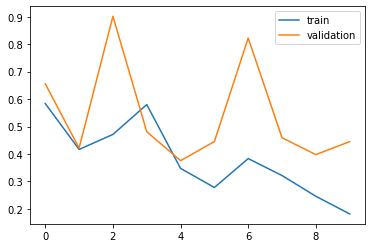

In [47]:
plt.plot(prediction.history['loss'],label='train')
plt.plot(prediction.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

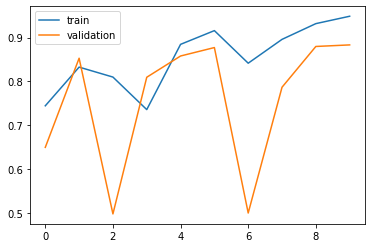

In [48]:
plt.plot(prediction.history['accuracy'],label='train')
plt.plot(prediction.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

## Creating Custom review predictor bot

In [52]:
def imdb_bot(review):
  sentence_list = []
  sentence_list.append(review)
  sequence = tokenizer.texts_to_sequences(sentence_list)
  input = pad_sequences(sequence,maxlen=200,padding='pre')
  #output = model.predict_classes(input)
  output = model.predict(input)
  if output.all() == 1:
    print("The reviews are good you should watch this")
  else:
    print("The reviews are not quite good you should try another one")

In [53]:
imdb_bot("Avengers")

The reviews are good you should watch this


In [54]:
imdb_bot("Spacejam")

The reviews are good you should watch this
